**Sales Data Analysis: Exploring Order Priorities, Product Demand, Customer Segments, Shipping Modes, and Regional Performance**\
This analysis explores sales data to uncover trends in order priorities, product demand, shipping preferences, and regional performance.\
 The goal is to derive insights for improving logistics, marketing, and inventory decisions based on customer orders, product categories, and geographic data.

- **How many orders fall into each category of the 'Order Priority'?**
- **What is the most effective delivery way?**
- **What insights can be drawn from the distribution of different 'Ship Modes' across various 'Product Categories' in the sales data?**
- **What is the distribution of different customer segments in the dataset?**
- **What are the most and least frequent 'Product Sub-Categories' within the 'Office Supplies' category, based on the sales data?**
- **How are the 'Product Sub-Categories' distributed within the 'Office Supplies' category in the sales data?**
- **Which 'Product Sub-Categories' in the 'Furniture' category have the highest and lowest frequency in the sales data?**
- **What is the distribution of days the order takes depends on it's priority ?**
- **Which month in 2015 had the highest/lowest number of orders?**
- **which state has the most profit?**

## *DATA ANALYSIS*

In [1]:
# Import Liraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
pd.set_option('display.max_columns',25)

In [3]:
sales = pd.read_csv('SuperStoreUS.csv')

In [4]:
sales.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192


In [5]:
sales.shape

(1952, 25)

In [6]:
sales.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [8]:
# Fill Missing Values
sales['Product Base Margin'] = sales['Product Base Margin'].fillna(sales['Product Base Margin'].mean())


## *Order Priority*

**How many orders fall into each category of the 'Order Priority'?**

In [9]:
#  Order Priority    
sales['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: count, dtype: int64

In [10]:
sales['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

In [11]:
sales['Order Priority'] = sales['Order Priority'].replace("Critical ","Critical")

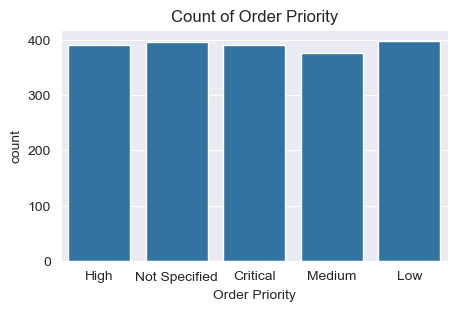

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x= 'Order Priority',data= sales)
plt.title('Count of Order Priority')
plt.show()

## *Ship Mode*

**What is the most effective delivery way ?**

In [13]:
sales['Ship Mode'].value_counts()

Ship Mode
Regular Air       1437
Delivery Truck     275
Express Air        240
Name: count, dtype: int64

In [14]:
x = sales['Ship Mode'].value_counts().index
y = sales['Ship Mode'].value_counts().values

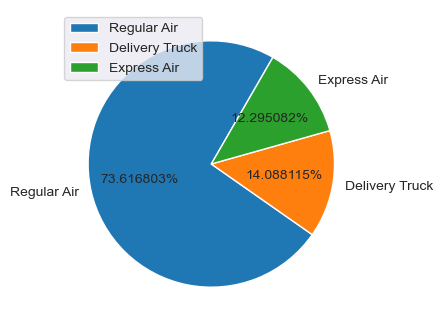

In [15]:
# create pie chart

plt.figure(figsize=(5,4))
plt.pie(y,labels=x, startangle=60, autopct= "%02f%%")
plt.legend(loc=2)
plt.show()

**Ship Mode with Order Priority**

Text(0.5, 1.0, 'Ship Mode with Order Priority')

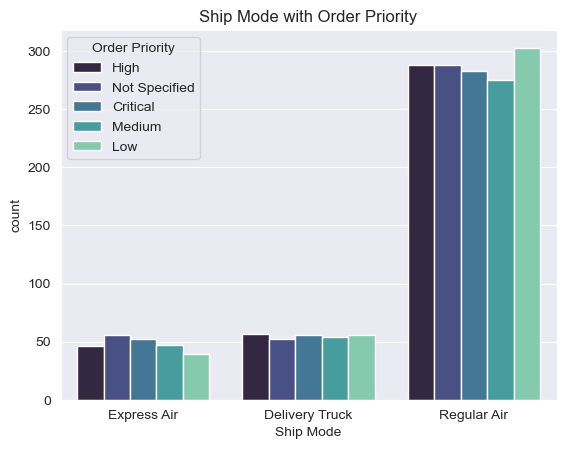

In [16]:
sns.countplot(data = sales, x = 'Ship Mode', hue = 'Order Priority', palette = 'mako')
plt.title('Ship Mode with Order Priority')

##### The **Regular Air** is the most effective way

#### "What insights can be drawn from the distribution of different 'Ship Modes' across various 'Product Categories' in the sales data?"

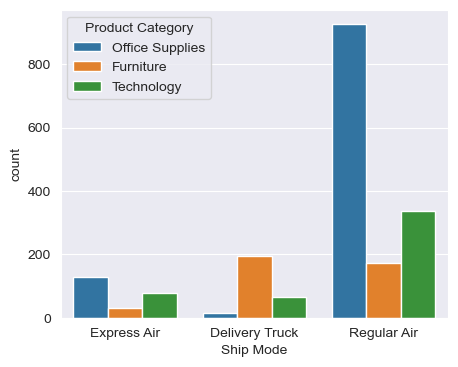

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x ='Ship Mode', data=sales, hue='Product Category')
plt.show()

##### This plot shows that Regular Air is the most common shipping method, especially for Office Supplies and Technology, while Furniture relies more on Delivery Truck. Express Air is the least used across all categories, with minimal variation between them.

## *Customer Segment*

**What is the distribution of different customer segments in the dataset?**

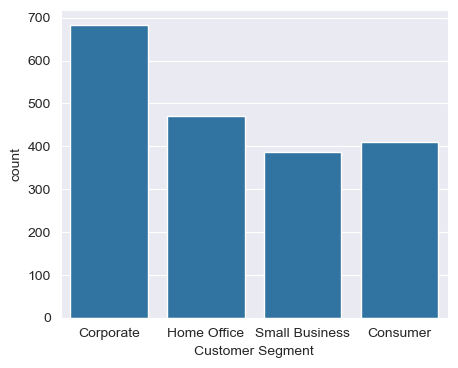

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x ='Customer Segment', data=sales)
plt.show()

##### This suggests that the Corporate segment dominates in the dataset, while Small Business and Consumer have the least representation.

## *Product Category*

**What is the distribution of sales across different product categories?**

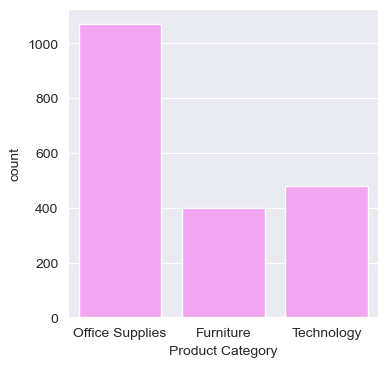

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x= "Product Category", data=sales, color= '#FF99FF')
plt.show()

**"What are the most and least frequent 'Product Sub-Categories' within the 'Office Supplies' category, based on the sales data?"**

In [20]:
# what is the  highest selling products in office supplies
office_supplies = sales[sales['Product Category'] =='Office Supplies']
office_supplies['Product Sub-Category'].value_counts()



Product Sub-Category
Paper                             284
Binders and Binder Accessories    200
Pens & Art Supplies               161
Storage & Organization            130
Appliances                        100
Labels                             71
Envelopes                          55
Scissors, Rulers and Trimmers      36
Rubber Bands                       34
Name: count, dtype: int64

**"How are the 'Product Sub-Categories' distributed within the 'Office Supplies' category in the sales data?"**

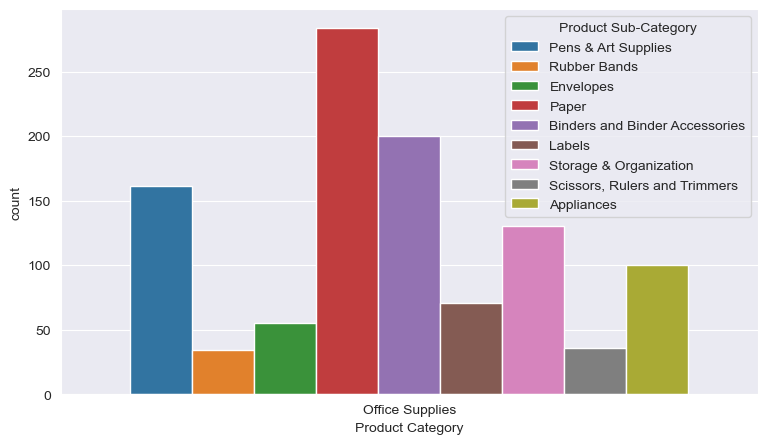

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(x = "Product Category", data= sales[sales['Product Category'] =='Office Supplies'], hue= "Product Sub-Category")
plt.show()

**"Which 'Product Sub-Categories' in the 'Furniture' category have the highest and lowest frequency in the sales data?"**

In [22]:
# what is the  highest selling products in furniture
furniture = sales[sales['Product Category'] =='Furniture']
furniture['Product Sub-Category'].value_counts()




Product Sub-Category
Office Furnishings    185
Chairs & Chairmats     92
Tables                 80
Bookcases              43
Name: count, dtype: int64

##### We need to convert Order Date and Ship Date in Datetime Feature

In [23]:
print(sales['Order Date'].dtype)
print(sales['Ship Date'].dtype)

object
object


In [24]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d/%m/%Y')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format='%d/%m/%Y')

In [25]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

#### What is the distribution of days the order takes depends on it's priority ?
To analyze the distribution of days an order takes depending on its priority, we need to calculate the delivery time (i.e., the number of days between the Order Date and the Delivery Date) and group the results by the Order Priority.

#### Subtract the Order Date from the Ship Date to calculate the time taken to ship an order.
**Group by Order Priority:** Use this Delivery time to explore how it changes for different order priority levels.

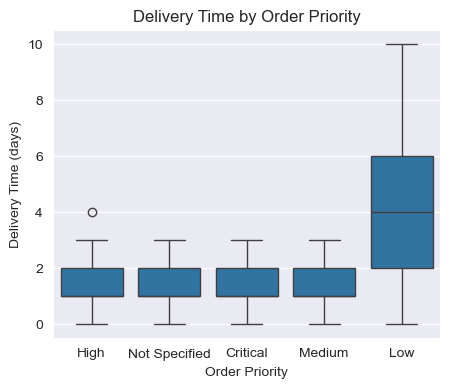

In [26]:
# Calculate the number of days to ship the order
sales['Delivery Time'] = (sales['Ship Date'] - sales['Order Date']).dt.days

# Plot the distribution of delivery time by order priority
plt.figure(figsize=(5,4))
sns.boxplot(x='Order Priority', y='Delivery Time', data=sales)
plt.title('Delivery Time by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Delivery Time (days)')
plt.show()




*As higher-priority orders would typically be processed and delivered faster, whereas low-priority orders are handled with more flexibility.*

**Number of orders by month**

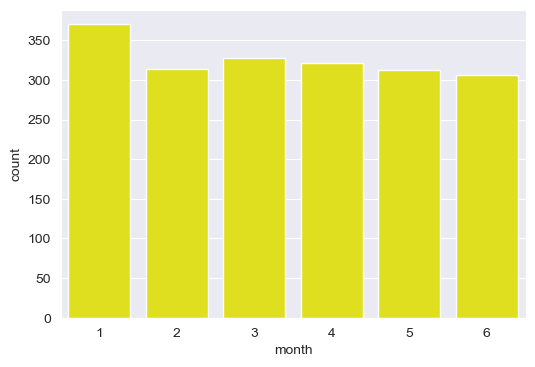

In [27]:
sales['month']= sales['Order Date'].dt.month

plt.figure(figsize=(6,4))
sns.countplot(x= 'month', data= sales, color= 'yellow')
plt.show()
           

**Which month in 2015 had the highest/lowest number of orders?**

In [28]:

#Group by month and count the number of orders
monthly_orders = sales.groupby(sales['Order Date'].dt.month).size()

# Identify the month with the highest and lowest number of orders
highest_month = monthly_orders.idxmax() #idxmax() will return the index (in this case, the month) where the number of orders is the highest (the maximum value).
lowest_month = monthly_orders.idxmin()

print(f"The month with the highest number of orders is: {highest_month}")
print(f"The month with the lowest number of orders is: {lowest_month}")


The month with the highest number of orders is: 1
The month with the lowest number of orders is: 6


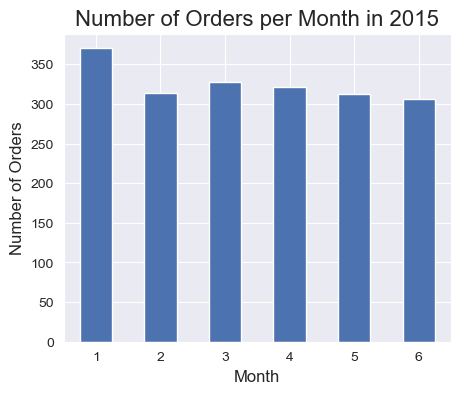

In [29]:
# Plot the number of orders per month
plt.figure(figsize=(5,4))
monthly_orders.plot(kind='bar', color ='#4C72B0')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders per Month in 2015', fontsize=16)
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.show()

**Sum of profit by product category**

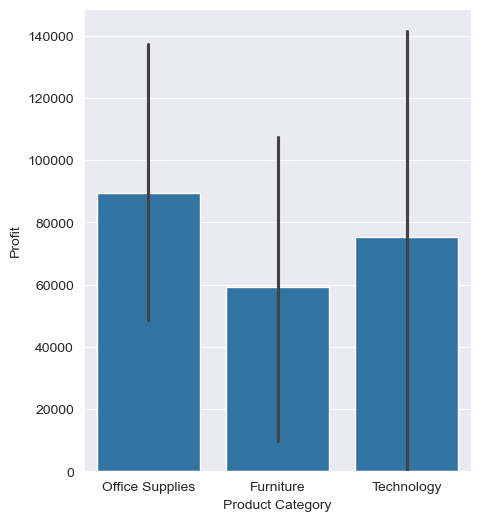

In [30]:
plt.figure(figsize=(5,6))
sns.barplot(x = 'Product Category', y = 'Profit', data= sales,  estimator='sum')
plt.show()

**Sum of 'Product Base Margin' for each Product Category**

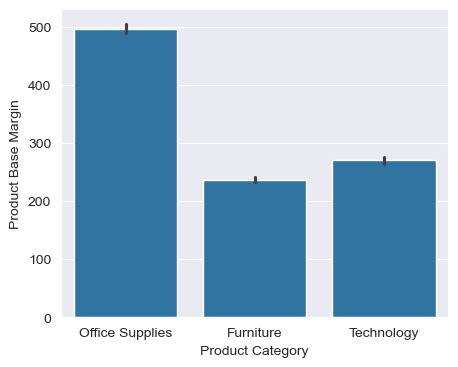

In [31]:
plt.figure(figsize=(5,4))
sns.barplot(x= 'Product Category', y= 'Product Base Margin', data= sales, estimator= 'sum')
plt.show()

**which state has the most profit**

In [32]:
print(sales.columns)
# Trim whitespace from column names
sales.columns = sales.columns.str.strip()


Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID', 'Delivery Time',
       'month'],
      dtype='object')


**Display the top 5 states or provinces based on the number of sales**

In [33]:
sales['State or Province'].value_counts()[:5]

State or Province
California    214
New York      129
Texas         124
Florida       123
Illinois       88
Name: count, dtype: int64

In [34]:
# Now, group by 'State or Province' and sum the 'Profit'
top_states = sales.groupby('State or Province')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_states)


# This code will group the sales data by the "State or Province" column, sum the profits for each state, 
# and then sort the results in descending order to find the top 10 states with the highest profits.

State or Province
California              37421.960192
Texas                   28078.850660
New York                27611.943319
Ohio                    23410.842026
Oregon                  17931.043400
Illinois                12321.579312
Michigan                12307.551892
Georgia                 11838.491414
District of Columbia    11677.363100
Colorado                 6965.462660
Name: Profit, dtype: float64


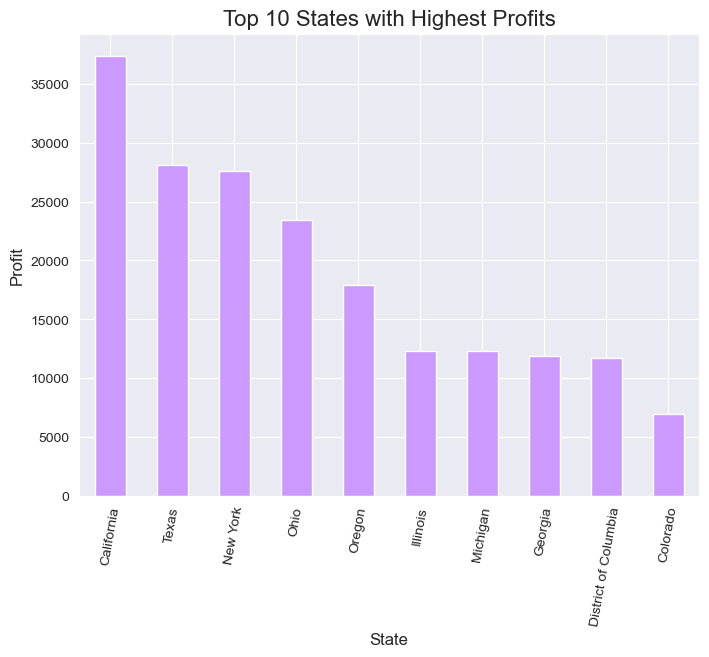

In [35]:

# Plot the top 10 states with the highest profits
plt.figure(figsize=(8,6))
top_states.plot(kind='bar', color ='#CC99FF')
plt.xlabel('State', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Top 10 States with Highest Profits', fontsize=16)
plt.xticks(rotation=80)  # Rotate state labels for better readability
plt.show()


In [36]:
# Which state has least profit ?
sales[sales['Profit'] == sales['Profit'].min()]



,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Delivery Time,month
975,18306,Medium,0.08,175.99,4.99,1738,Dean Solomon,Regular Air,Corporate,Technology,Telephones and Communication,Small Box,...,South,North Carolina,Gastonia,28052,2015-03-28,2015-03-28,-16476.838,10,1486.34,85865,0,3


#### *The result of the sales data analysis shows key insights into order behavior, shipping preferences, and regional performance:*
- **Order Delivery Times**: Orders with "High" priority were delivered faster than those with "Low" priority or "Not Specified". This suggests that high-priority orders are processed and shipped more promptly.
- **Order Priorities**: are evenly distributed, with "Low" and "Not Specified" being the most common.
- **Regular Air**: is the most frequently used shipping mode, indicating a preference for standard delivery options.
- **Top products** include **Paper, Binders, and Pens & Art Supplies, with Office Furnishings** leading in the furniture category.
- **January** is the busiest month for orders, while June has the fewest, showing possible seasonal trends.
- **California** generates the highest number of orders and profits, followed by **Texas** and **New York**.
- **Profits** are largely driven by technology and furniture products, with some variations across categories.
- **Delivery times** are generally short, showing efficient shipping processes.